In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
from copy import deepcopy

In [2]:
df_date = pd.read_pickle('Pickles/df_date_2.pkl')
# df_date = df_date.reset_index()
# df_date.drop('index', axis = 1, inplace = True)
df_date = deepcopy(df_date[df_date['date'].dt.year >= 2014])

In [3]:
df_date['date'].dt.year.value_counts()

2016    366
2017    365
2015    365
2014    365
2018     90
Name: date, dtype: int64

In [4]:
df_date.columns

Index(['date', 'num_incidents', 'num_killed', 'num_injured', 'gun_stolen',
       'num_guns_involved', 'suicide', 'accidental', 'domestic_violence',
       'gang_related', 'non_shooting_incident', 'gun_shop_robbery',
       'drive_by_shooting', 'officer_involved_shooting', 'child_involved',
       'mass_shooting', 'drug_involved', 'assault_weapon', 'num_unharmed',
       'num_arrested', 'num_suspects', 'num_victims'],
      dtype='object')

In [5]:
df_date.rename({'date': 'ds', 'num_victims': 'y'}, axis = 1, inplace = True)
df_date = df_date[['ds', 'y']]
victim_prophet = Prophet(changepoint_prior_scale = 0.05)
victim_prophet.fit(df_date)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/charlieyaris/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [6]:
victim_forecast = victim_prophet.make_future_dataframe(periods=365 * 2, freq='D')
victim_forecast = victim_prophet.predict(victim_forecast)

In [7]:
victim_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,127.716635,84.454627,138.165209,127.716635,127.716635,-15.052901,-15.052901,-15.052901,-9.967633,-9.967633,-9.967633,-5.085268,-5.085268,-5.085268,0.0,0.0,0.0,112.663734
1,2014-01-02,127.788336,80.348078,133.553944,127.788336,127.788336,-20.381721,-20.381721,-20.381721,-15.412207,-15.412207,-15.412207,-4.969514,-4.969514,-4.969514,0.0,0.0,0.0,107.406616
2,2014-01-03,127.860037,87.840205,138.346395,127.860037,127.860037,-15.049706,-15.049706,-15.049706,-10.145026,-10.145026,-10.145026,-4.904680,-4.904680,-4.904680,0.0,0.0,0.0,112.810331
3,2014-01-04,127.931739,117.975694,169.191715,127.931739,127.931739,15.520280,15.520280,15.520280,20.410957,20.410957,20.410957,-4.890677,-4.890677,-4.890677,0.0,0.0,0.0,143.452019
4,2014-01-05,128.003440,125.287573,179.712726,128.003440,128.003440,23.422557,23.422557,23.422557,28.349084,28.349084,28.349084,-4.926527,-4.926527,-4.926527,0.0,0.0,0.0,151.425996


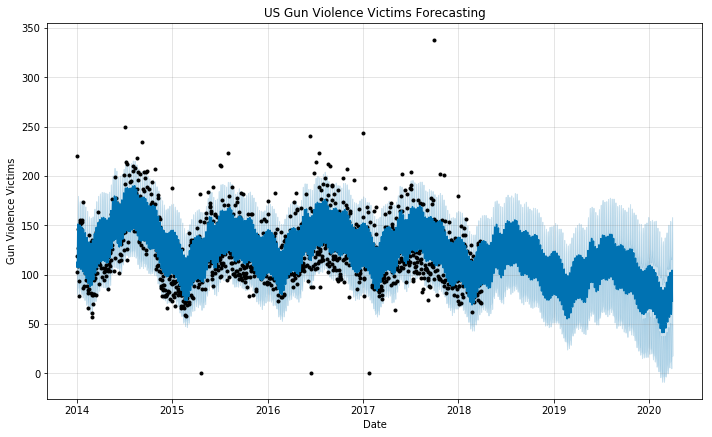

In [8]:
victim_prophet.plot(victim_forecast, xlabel = 'Date', ylabel = 'Gun Violence Victims')
plt.title('US Gun Violence Victims Forecasting');

In [9]:
# Try 4 different changepoints
for changepoint in [0.001, 0.05, 0.1, 0.5]:
    model = Prophet(daily_seasonality = False, changepoint_prior_scale = changepoint)
    model.fit(df_date)
    future = model.make_future_dataframe(periods=365, freq='D')
    future = model.predict(future)
    victim_forecast[changepoint] = future['yhat']

In [10]:
# Create the plot
plt.figure(figsize=(10, 8))
# Actual observations
plt.plot(victim_forecast['ds'], victim_forecast['y'], 'ko', label = 'Observations')
colors = {0.001: 'b', 0.05: 'r', 0.1: 'grey', 0.5: 'gold'}

# Plot each of the changepoint predictions
for changepoint in [0.001, 0.05, 0.1, 0.5]:
    plt.plot(victim_forecast['ds'], victim_forecast[changepoint], color = colors[changepoint], label = '%.3f prior scale' % changepoint)
    
plt.legend(prop={'size': 14})
plt.xlabel('Date'); plt.ylabel('Gun Violence Victims'); plt.title('Effect of Changepoint Prior Scale');

KeyError: 'y'

<Figure size 720x576 with 0 Axes>

In [ ]:
victim_prophet.changepoints[:10]

In [ ]:
victim_forecast.head()

In [ ]:
# Create subplots to set figure size
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# Plot estimate
ax.plot(victim_forecast['ds'], victim_forecast['yhat'], label = 'victim prediction')
# Plot uncertainty values
ax.fill_between(victim_forecast['ds'].dt.to_pydatetime(), victim_forecast['yhat_upper'], victim_forecast['yhat_lower'], alpha=0.6, edgecolor = 'k')
plt.xlabel('Date')
plt.ylabel('Gun Violence Victims')
plt.title('Gun Violence Victim Forecasting with Uncertainty')
plt.legend();